In [47]:
import numpy as np

# Define parameters
T = 1000  # Number of time periods
beta_0 = 0.01
beta_1 = 0.9
gamma_0 = 0.01
gamma_1 = 0.9
sigma_epsilon = 0.1
sigma_u = 0.2
sigma_eta = 0.15

# Initialize arrays
r = np.zeros(T)
mu = np.zeros(T)
l = np.zeros(T)
eta = np.zeros(T)
epsilon = np.random.normal(0, sigma_epsilon, T)
u = np.random.normal(0, sigma_u, T)

# Generate data
for t in range(1, T):
    eta[t] = (mu[t-1] - l[t-1])
    mu[t] = beta_0 + beta_1 * mu[t-1] + u[t]
    l[t] = gamma_0 + gamma_1 * l[t-1] + np.random.normal(0, sigma_eta)
    r[t] = mu[t] + eta[t] + epsilon[t]

# Print the generated data
#print("Generated r:", r)
#print("Generated mu:", mu)
#print("Generated l:", l)
#print("Generated eta:", eta)
#print("Generated epsilon:", epsilon)

Text(0.5, 1.0, 'State Space Simulation')

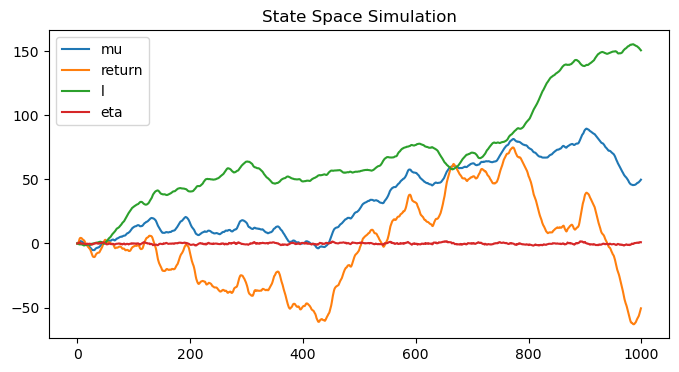

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4))
plt.plot(mu.cumsum(), label = 'mu')
plt.plot(r.cumsum(), label = 'return')
plt.plot(l.cumsum(), label = 'l')
plt.plot(eta, label = 'eta')
plt.legend()
plt.grid(False)
plt.title('State Space Simulation')

In [49]:
import pandas as pd

import statsmodels.api as sm

X = pd.DataFrame([eta, mu], index = ['eta','mu']).T
y = r

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          4.936e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        20:59:47   Log-Likelihood:                          904.25
No. Observations:                1000   AIC:                                     -1805.
Df Residuals:                     998   BIC:                                     -1795.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
X = pd.DataFrame([mu], index = ['mu']).T
y = r

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              3662.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        21:00:07   Log-Likelihood:                         -627.77
No. Observations:                1000   AIC:                                      1258.
Df Residuals:                     999   BIC:                                      1262.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(300, 20) 
y1 = (X[:, 0] + X[:, 1] > 1).astype(int) 

y_second = (X[:, 2] + X[:, 3] > 1).astype(int) 
y2 = (X[:, 16] + X[:, 17] > 1).astype(int) 
y3 = (X[:, 18] + X[:, 19] > 1).astype(int) 

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2)

model1 = RandomForestClassifier()
model1.fit(X_train1[:, 4:7], y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.2)

model2 = RandomForestClassifier()
model2.fit(X_train2[:, 7:11], y_train2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.2)

model3 = RandomForestClassifier()
model3.fit(X_train3[:, 11:16], y_train3)

RandomForestClassifier()

In [25]:
model1.feature_importances_

array([0.33898296, 0.33764711, 0.32336993])

In [26]:
model2.feature_importances_

array([0.23250511, 0.24684299, 0.26041338, 0.26023851])

In [27]:
model3.feature_importances_

array([0.18792023, 0.21807218, 0.18371078, 0.18014087, 0.23015593])

In [29]:
from sklearn.metrics import roc_curve, auc, classification_report

# Logistic Regression 모델 예측
y_pred_1 = model1.predict(X_test1[:, 4:7])

# Decision Tree 모델 예측
y_pred_2 = model2.predict(X_test2[:, 7:11])

# Random Forest 모델 예측
y_pred_3 = model3.predict(X_test3[:, 11:16])

# ROC Curve 및 AUC 계산
fpr_1, tpr_1, _ = roc_curve(y_test1, y_pred_1)
roc_auc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, _ = roc_curve(y_test2, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, _ = roc_curve(y_test3, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# Classification Report 출력
print("Model 1:")
print(classification_report(y_test1, y_pred_1))

print("Model 2:")
print(classification_report(y_test2, y_pred_2))

print("Model 3:")
print(classification_report(y_test3, y_pred_3))

Model 1:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        36
           1       0.46      0.67      0.54        24

    accuracy                           0.55        60
   macro avg       0.57      0.57      0.55        60
weighted avg       0.59      0.55      0.55        60

Model 2:
              precision    recall  f1-score   support

           0       0.36      0.43      0.39        30
           1       0.29      0.23      0.26        30

    accuracy                           0.33        60
   macro avg       0.33      0.33      0.33        60
weighted avg       0.33      0.33      0.33        60

Model 3:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        30
           1       0.45      0.50      0.48        30

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45    

In [31]:
x1 = model1.predict_proba(X_train1[:, 4:7])[:,1]
x2 = model2.predict_proba(X_train2[:, 7:11])[:,1]
x3 = model3.predict_proba(X_train3[:, 11:16])[:,1]

In [32]:
second_model_X = pd.DataFrame([x1,x2,x3], index = ['feature1','feature2','feature3']).T

In [33]:
second_model_X

,feature1,feature2,feature3
0,0.75,0.76,0.83
1,0.87,0.80,0.21
2,0.29,0.82,0.10
3,0.85,0.19,0.21
4,0.81,0.71,0.78
...,...,...,...
235,0.11,0.25,0.13
236,0.89,0.89,0.17
237,0.76,0.16,0.78
238,0.73,0.79,0.90


In [38]:
X_train, X_test, y_train, y_test = train_test_split(second_model_X, y_second[:240], test_size = 0.2)

In [40]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
model.feature_importances_

array([0.35079475, 0.32898913, 0.32021612])

In [42]:
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [43]:
print("Secondary Model:")
print(classification_report(y_test, y_pred))

Secondary Model:
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        23
           1       0.44      0.32      0.37        25

    accuracy                           0.44        48
   macro avg       0.44      0.44      0.43        48
weighted avg       0.44      0.44      0.43        48


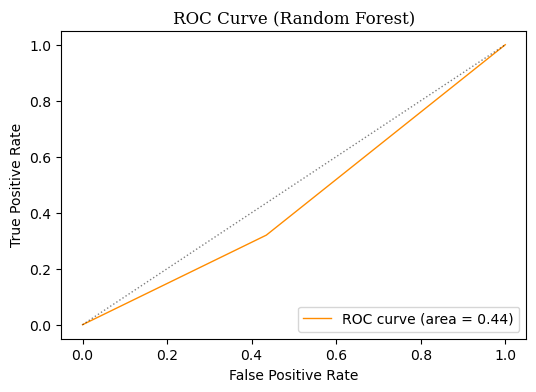

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='k', lw=1, linestyle = ':', alpha = 0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend(loc='lower right')
plt.show()